## Tennis Match Analysis

This notebook provides an analysis of tennis match data from ATP and Grand Slam tournaments over the past 30 years.The analysis focuses on various factors such as match duration, surface type, and player characteristics.

### Key Insights:
- Trends in match durations for different surfaces
- The impact of player height on ace performance
- Factors influencing match outcomes


## Load Packages
This section loads necessary Python libraries such as Pandas for data manipulation, Matplotlib for plotting, and Seaborn for enhanced visualizations. These tools are essential for the analysis as they provide the functions needed to manipulate large datasets and visualize the results effectively.

In [1]:
# Load necessary packages for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', None)

## Get Data from all the ATP + Grand Slam Tennis Matches in the Last 30 Years
This section involves loading the data which consists of records from ATP and Grand Slam tennis matches. We will perform initial data loading, view the dataset structure, and prepare the data by cleaning and necessary transformations.

In [2]:
# Load the dataset
dataframes=[]

for x in range(1993,2024):
    x=pd.read_csv(f'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{x}.csv')
    dataframes.append(x)
df=pd.concat(dataframes,ignore_index=True)

# Preview the first few rows of the dataset to ensure correct loading
df.head()



,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1993-339,Adelaide,Hard,32,A,19930104,1,101990,1.0,NaN,Richard Krajicek,R,196.0,NED,21.0,102358,NaN,NaN,Thomas Enqvist,R,190.0,SWE,18.8,6-1 6-4,3,R32,67.0,14.0,1.0,47.0,34.0,28.0,6.0,9.0,1.0,2.0,2.0,5.0,56.0,32.0,17.0,10.0,8.0,4.0,8.0,10.0,NaN,63.0,NaN
1,1993-339,Adelaide,Hard,32,A,19930104,2,101711,NaN,NaN,Alex Obrien,R,185.0,USA,22.8,100714,NaN,Q,Broderick Dyke,L,183.0,AUS,32.0,7-6(4) 7-6(5),3,R32,124.0,5.0,3.0,86.0,55.0,35.0,17.0,12.0,3.0,6.0,4.0,1.0,94.0,59.0,39.0,17.0,12.0,9.0,12.0,127.0,NaN,545.0,NaN
2,1993-339,Adelaide,Hard,32,A,19930104,3,101890,NaN,NaN,Jonathan Stark,R,188.0,USA,21.7,101889,NaN,NaN,Todd Woodbridge,R,178.0,AUS,21.7,6-2 6-2,3,R32,60.0,3.0,1.0,41.0,26.0,23.0,10.0,8.0,2.0,2.0,1.0,4.0,48.0,26.0,15.0,9.0,8.0,1.0,5.0,85.0,NaN,54.0,NaN
3,1993-339,Adelaide,Hard,32,A,19930104,4,102146,NaN,Q,Jordi Burillo,R,188.0,ESP,20.0,101609,7.0,NaN,David Wheaton,R,193.0,USA,23.5,6-1 6-3,3,R32,55.0,7.0,0.0,38.0,24.0,19.0,14.0,8.0,1.0,1.0,1.0,3.0,42.0,19.0,12.0,9.0,8.0,1.0,5.0,157.0,NaN,44.0,NaN
4,1993-339,Adelaide,Hard,32,A,19930104,5,101334,3.0,NaN,Alexander Volkov,L,188.0,RUS,25.8,101298,NaN,NaN,Jonas Svensson,R,188.0,SWE,26.2,7-6(4) 6-3,3,R32,82.0,6.0,2.0,65.0,28.0,23.0,27.0,11.0,1.0,1.0,2.0,0.0,63.0,43.0,31.0,9.0,10.0,4.0,5.0,17.0,NaN,81.0,NaN


In [3]:
df['tourney_date']=pd.to_datetime(df['tourney_date'],format='%Y%m%d')
df['year'] = df['tourney_date'].dt.year


##### Let's explore how the match durations have changed over the last 30 years in best of 3 matches


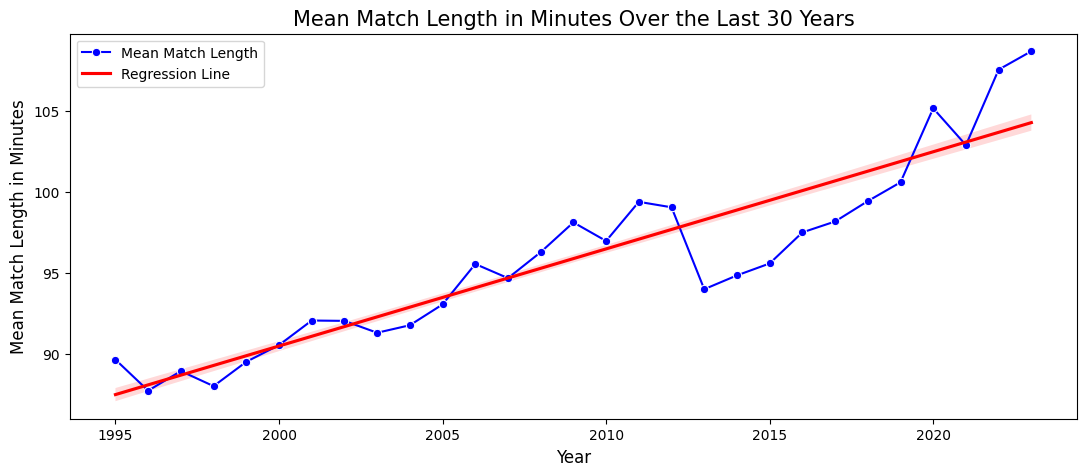

The rate of increase per year is 36.01 seconds/year.


In [4]:
# Filter the DataFrame for 'best_of' 3 matches since 1994 and drop rows with NaN in 'minutes' or 'year'
df_filtered = df[(df['best_of'] == 3) & (df['year'] > 1994)].dropna(subset=['minutes', 'year'])

# Calculate the mean match lengths per year
mean_lengths = df_filtered.groupby('year')['minutes'].mean().reset_index()

# Plotting setup
plt.figure(figsize=(13, 5))

# Plot the mean match lengths
sns.lineplot(data=mean_lengths, x='year', y='minutes', marker='o', color='blue', label='Mean Match Length')

# Add regression line
sns.regplot(data=df_filtered, x='year', y='minutes', scatter=False, label='Regression Line', color='red')

# Adding titles and labels
plt.title('Mean Match Length in Minutes Over the Last 30 Years',fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Match Length in Minutes', fontsize=12)
plt.legend()

# Display the plot
plt.show()

# Calculate the slope of the regression line
slope, intercept = np.polyfit(df_filtered['year'], df_filtered['minutes'], 1)
rate_of_increase = round(slope * 60, 2)  # convert the slope from minutes per year to seconds per year

print(f"The rate of increase per year is {rate_of_increase} seconds/year.")


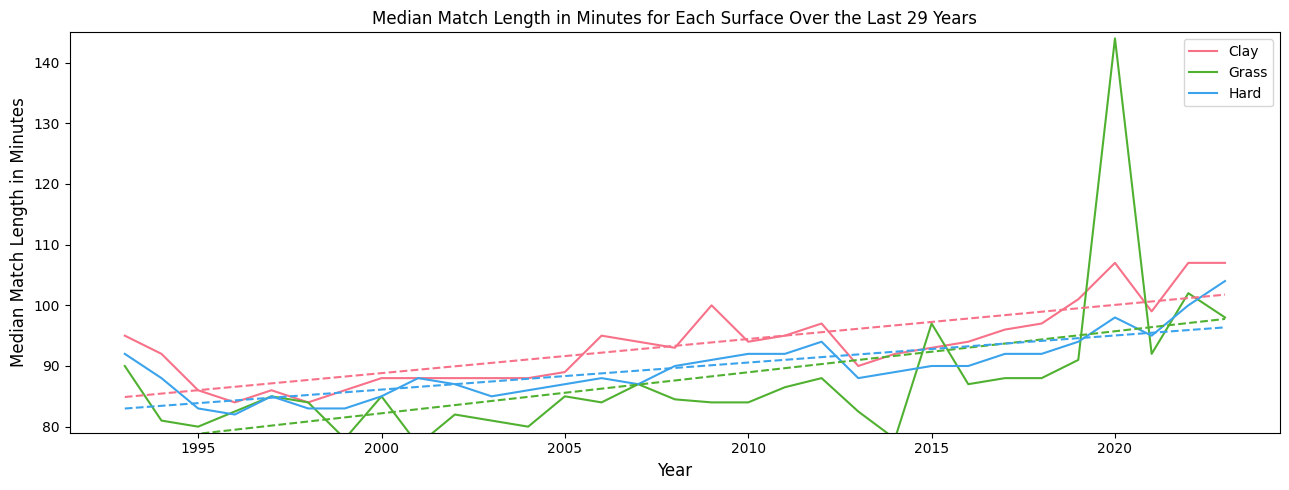

In [5]:
df_filtered = df[(df['surface'] != 'Carpet') & (df['best_of'] == 3)].dropna(subset=['minutes', 'year'])
   
median_lengths_surface = df_filtered.groupby(['year', 'surface'])['minutes'].median().reset_index()

fig, ax = plt.subplots(figsize=(13, 5))
palette = sns.color_palette("husl", n_colors=len(median_lengths_surface['surface'].unique()))
lineplot = sns.lineplot(data=median_lengths_surface, x='year', y='minutes', hue='surface', ax=ax, palette=palette)

handles, labels = ax.get_legend_handles_labels()

surfaces = median_lengths_surface['surface'].unique()
for i, surface in enumerate(surfaces):
    surface_data = median_lengths_surface[median_lengths_surface['surface'] == surface]
    coeffs = np.polyfit(surface_data['year'], surface_data['minutes'], 1)
    reg_y = np.polyval(coeffs, surface_data['year'])
    ax.plot(surface_data['year'], reg_y, color=palette[i], linestyle='--')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Match Length in Minutes', fontsize=12)
plt.ylim(79, 145)
plt.title('Median Match Length in Minutes for Each Surface Over the Last 29 Years')
ax.legend(handles=handles)
plt.tight_layout()
plt.show()


The duration of grass court matches in 2020 was notably longer than usual, likely influenced by the COVID-19 pandemic, which significantly reduced the number of matches played on grass courts. Apart from this anomaly, there has been a general trend of increasing match lengths across all three surfaces over recent years.

Now Let's see how the average height has changed from the players over the last 30 years and if that had a reason on how many aces got served.

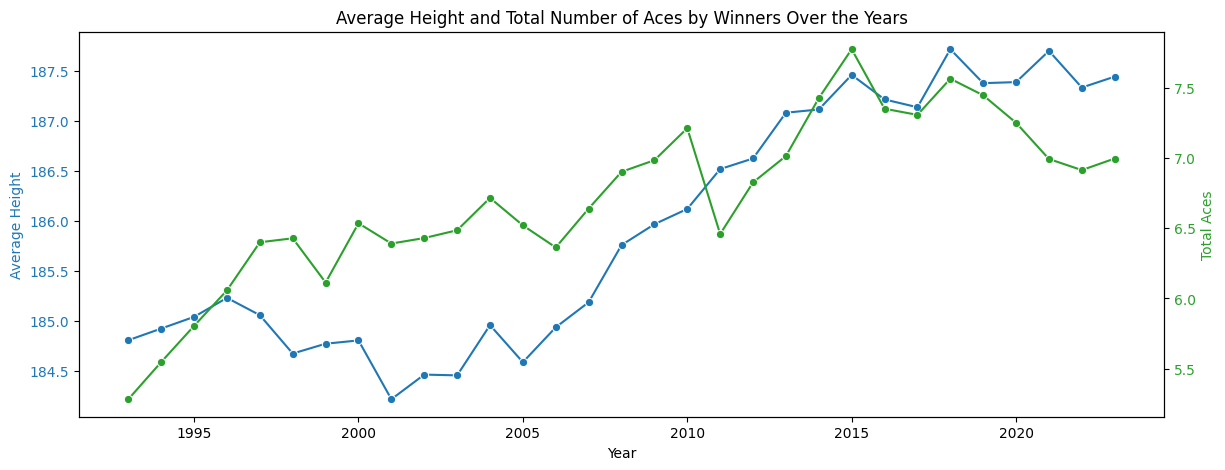

In [6]:
# Load necessary packages for data manipulation and visualization
import matplotlib.pyplot as plt
import seaborn as sns

winners_df = df[df['winner_ht'].notna()]
winners_stats = winners_df.groupby('year').agg({'winner_ht': 'mean', 'w_ace': 'mean'}).reset_index()


# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(14, 5))

color = 'tab:blue'
# Plotting the average height of winners on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Height', color=color)
sns.lineplot(data=winners_stats, x='year', y='winner_ht', marker='o', color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for the total number of aces, sharing the same x-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Total Aces', color=color)  # we already handled the x-label with ax1
sns.lineplot(data=winners_stats, x='year', y='w_ace', marker='o', color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# Optional: Add a title
plt.title('Average Height and Total Number of Aces by Winners Over the Years')

plt.show()


In [7]:
winners_stats

,year,winner_ht,w_ace
0,1993,184.808076,5.282921
1,1994,184.924734,5.547784
2,1995,185.041879,5.804864
3,1996,185.232000,6.058022
4,1997,185.058603,6.399810
5,1998,184.674571,6.428173
6,1999,184.773008,6.113304
7,2000,184.805979,6.535264
8,2001,184.217431,6.390778
9,2002,184.463745,6.429880


#### Findings: 
From 2005 to 2020, the ATP tour has observed notable trends in the physical profiles and performances of match winners. Initially, there was a noticeable increase in the average height of players, rising by about 3 centimeters until 2015, suggesting a trend toward taller athletes who could potentially dominate with powerful serves and extended reach.

However, after 2015, this trend in increasing height stabilized, and the rise in the number of aces served also peaked and subsequently declined. This shift indicates a potential balance being reached, where the advantages of height are countered by other strategic elements in the game.

A key factor in these changes appears to be the adaptation of playing surfaces across major tournaments, which have become noticeably slower, diminishing the sheer advantage of power serves. This evolution in court surfaces promotes a more rounded style of play, requiring players to excel not just in serving but in endurance, return accuracy, and tactical depth.

To understand these evolving dynamics, we've visualized these trends using a dual-axis time series plot, highlighting both the physical evolution and the tactical adaptations in professional tennis over the years. 


<br>
<br>
Let's go back to see if average height of players actually has a influence on gametime

Correlation between average height and match duration: 0.04


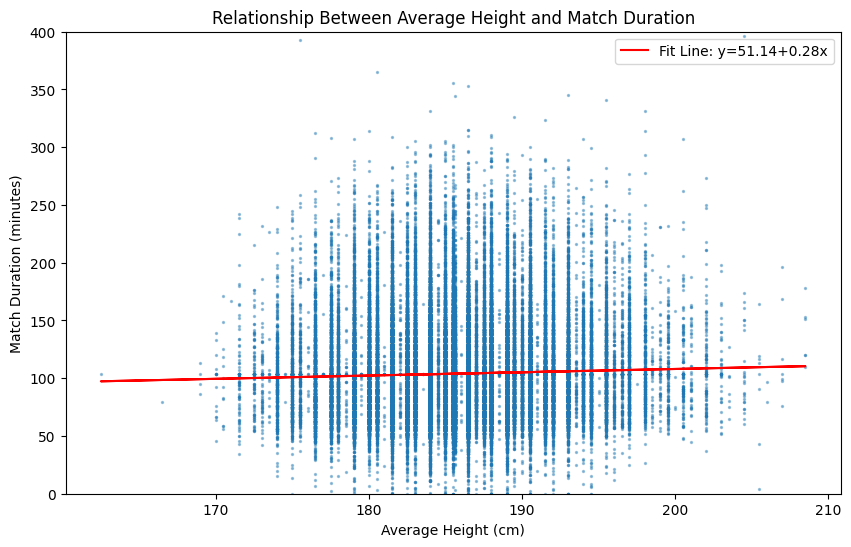

Slope: 0.284
Intercept: 51.14
R-value: 0.036
P-value: 6.027e-29
Standard Error: 0.025


In [8]:
# Calculate the average height for each match
df['avg_height'] = (df['winner_ht'] + df['loser_ht']) / 2

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['avg_height', 'minutes']] = imputer.fit_transform(df[['avg_height', 'minutes']])

# Calculate the correlation between average height and match duration
correlation = df['avg_height'].corr(df['minutes'])
print(f"Correlation between average height and match duration: {correlation:.2f}")


slope, intercept, r_value, p_value, std_err = linregress(df['avg_height'], df['minutes'])

plt.figure(figsize=(10, 6))
plt.scatter(df['avg_height'], df['minutes'], alpha=0.4,s=2)
plt.plot(df['avg_height'], intercept + slope*df['avg_height'], 'r', label=f'Fit Line: y={intercept:.2f}+{slope:.2f}x')
plt.ylim(0, 400)
plt.title('Relationship Between Average Height and Match Duration')
plt.xlabel('Average Height (cm)')
plt.ylabel('Match Duration (minutes)')
plt.legend()
plt.show()

# Print the results of the regression
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-value: {r_value:.3f}")
print(f"P-value: {p_value:.3e}")
print(f"Standard Error: {std_err:.3f}")


#### Findings: 
From the analysis, we see that there's only a very weak correlation between a player's average height and the duration of their matches. It seems that height may play some role, possibly influencing factors like the effectiveness of serves. However, it's clear that other aspects such as a player's style, fitness level, and strategic choices during the match have a far greater impact on how long the games last.

Conclusion:
Based on the findings, it's apparent that height by itself isn't a reliable predictor of match duration in tennis. This highlights the complexity of the game, where numerous variables interact to influence the outcome and length of a match far more than any single physical attribute.

#### Ranking difference vs Match duration: 
Let's see if the difference ranking between the winner and loser affects the match duration. We will calculate the difference in ranking between the winner and loser and then plot it against the match duration.

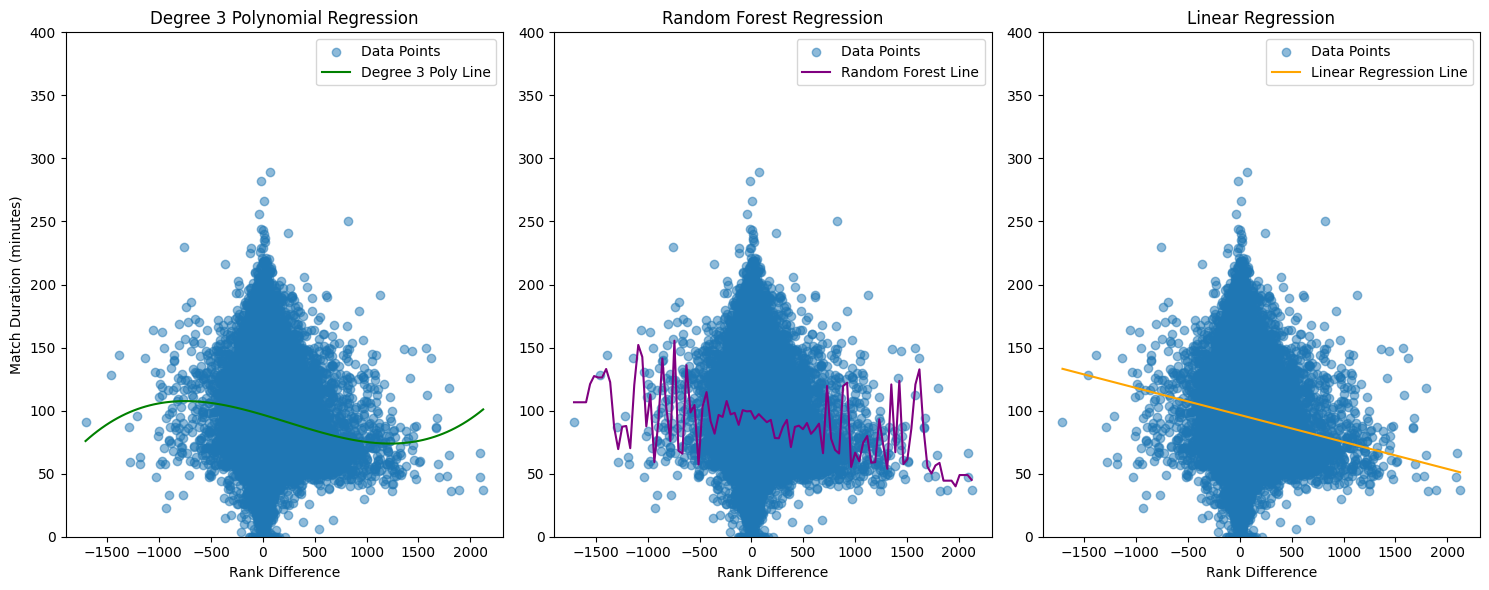

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

df_filtered.loc[:, 'rank_difference'] = df_filtered['loser_rank'] - df_filtered['winner_rank']
df_model = df_filtered.dropna(subset=['rank_difference', 'minutes']).copy()
df_model.loc[:, 'rank_difference'] = df_model['loser_rank'] - df_model['winner_rank']

# Prepare the data
X = df_model['rank_difference'].values.reshape(-1, 1)
y = df_model['minutes'].values

# Generate a sequence of values from minimum to maximum rank difference for plotting
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Create a polynomial regression model of degree 3
poly_model_degree3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model_degree3.fit(X, y)
y_fit_degree3 = poly_model_degree3.predict(X_fit)

# Create a random forest regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)
y_rf_fit = rf_regressor.predict(X_fit)

# Fit a simple linear regression to the untransformed data
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_fit = lin_reg.predict(X_fit)

# Plotting all models
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.scatter(X, y, alpha=0.5, label='Data Points')
plt.plot(X_fit, y_fit_degree3, color='green', label='Degree 3 Poly Line')
plt.title('Degree 3 Polynomial Regression')
plt.xlabel('Rank Difference')
plt.ylabel('Match Duration (minutes)')
plt.ylim(0, 400)  # Set y-axis limit
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X, y, alpha=0.5, label='Data Points')
plt.plot(X_fit, y_rf_fit, color='purple', label='Random Forest Line')
plt.title('Random Forest Regression')
plt.xlabel('Rank Difference')
plt.ylim(0, 400)  # Set y-axis limit
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X, y, alpha=0.5, label='Data Points')
plt.plot(X_fit, y_lin_fit, color='orange', label='Linear Regression Line')
plt.title('Linear Regression')
plt.xlabel('Rank Difference')
plt.ylim(0, 400)  # Set y-axis limit
plt.legend()

plt.tight_layout()
plt.show()


#### Discussion

In this segment of my project, I explored the relationship between rank difference (defined as the loser's rank minus the winner's rank) and the duration of tennis matches. I utilized three distinct regression models to understand how well they could predict match duration based on the rank difference between players. Below, I discuss the methodology and findings from each model:

1. Degree 3 Polynomial Regression
I chose a third-degree polynomial regression model to see if any non-linear trends could be captured, considering that rank differences might not linearly relate to match duration. The polynomial curve attempted to fit the various peaks and troughs, but overall, it remained relatively flat across the rank difference axis. This suggested a limited non-linear relationship and indicated that the complexity of match durations might not be fully explained by simple polynomial terms.

2. Random Forest Regression
To handle potential non-linear interactions and the complex nature of the data, I applied a random forest regression model. The model's output was quite jagged, reflecting its capacity to model detailed fluctuations and capture a high level of granularity in the data. However, the fit seemed to overfit, as indicated by the volatile line, which suggested it was capturing noise as well as the underlying trend.

3. Linear Regression
As a baseline model, I used a simple linear regression to assess the basic linear relationship between rank difference and match duration. The result was a nearly flat line, which indicated a very weak or non-existent linear relationship between the variables. This outcome highlighted the limitations of using a simple linear approach for this complex dataset.

Observations and Conclusions

Data Distribution: The data points are predominantly clustered at shorter match durations, regardless of the rank difference, which suggests that most matches do not extend to longer times. This clustering might influence the effectiveness of any regression model.
Model Evaluation: None of the models perfectly captured the dynamics within the data. While the polynomial and random forest models made efforts to adapt to the data's behavior, they either did not capture all the complexity or tended to overfit.


#### Let's Look at the shortest and longest matches in the dataset

In [10]:

import re
import pandas as pd

# Regular expression pattern to match valid score strings
valid_score_pattern = re.compile(r'^[0-9\-\(\)\s]+$')

# Function to check if a score string is valid
def is_valid_score(score):
    return bool(valid_score_pattern.match(score))

# Function to count the total number of games from a score string
def count_games(score):
    games = 0
    sets = score.split()
    for set_score in sets:
        if '(' in set_score:
            set_score = set_score.split('(')[0]
        games += sum(map(int, set_score.split('-')))
    return games

# Filter out rows with invalid scores
df_filtered_valid = df[df['score'].apply(is_valid_score)].copy()

# Add a new column 'games' that holds the number of games per match
df_filtered_valid['games'] = df_filtered_valid['score'].apply(count_games)

# Define the threshold: 10 minutes per game for max, 2 minutes per game for min
df_filtered_valid['max_minutes'] = df_filtered_valid['games'] * 10
df_filtered_valid['min_minutes'] = df_filtered_valid['games'] * 2

# Filter the DataFrame based on the thresholds
filtered_df = df_filtered_valid[
    (df_filtered_valid['minutes'] <= df_filtered_valid['max_minutes']) &
    (df_filtered_valid['minutes'] >= df_filtered_valid['min_minutes'])
]

# Additional Analysis:
# Average number of games per match
average_games = filtered_df['games'].mean()

# Average minutes spent per match
average_minutes = filtered_df['minutes'].mean()

# Top 5 longest matches
top_5_longest = filtered_df.sort_values(by='minutes', ascending=False).head(5)

# Top 5 shortest matches
top_5_shortest = filtered_df.sort_values(by='minutes', ascending=True).head(5)

# Interpretation:
interpretation = f"""
The dataset was filtered to remove invalid scores and those matches that don't fall within expected time ranges (2 to 10 minutes per game).
After filtering, the average number of games per match is {average_games:.1f} and the average time spent per match is {average_minutes:.0f} minutes.
The top 5 longest matches by duration have the following details:
{top_5_longest[['tourney_name', 'winner_name', 'loser_name', 'minutes', 'games','score']]}

The top 5 shortest matches by duration have the following details:
{top_5_shortest[['tourney_name', 'winner_name', 'loser_name', 'minutes', 'games','score']]}
"""

# Output the interpretation
print(interpretation)



The dataset was filtered to remove invalid scores and those matches that don't fall within expected time ranges (2 to 10 minutes per game).
After filtering, the average number of games per match is 25.6 and the average time spent per match is 105 minutes.
The top 5 longest matches by duration have the following details:
          tourney_name       winner_name       loser_name  minutes  games  \
60015        Wimbledon        John Isner    Nicolas Mahut    665.0    183   
83816        Wimbledon    Kevin Anderson       John Isner    396.0     99   
41170    Roland Garros   Fabrice Santoro   Arnaud Clement    393.0     71   
88652    Roland Garros  Lorenzo Giustino  Corentin Moutet    365.0     74   
64599  Australian Open    Novak Djokovic     Rafael Nadal    353.0     55   

                                score  
60015     6-4 3-6 6-7(7) 7-6(3) 70-68  
83816  7-6(6) 6-7(5) 6-7(9) 6-4 26-24  
41170        6-4 6-3 6-7(5) 3-6 16-14  
88652     0-6 7-6(7) 7-6(3) 2-6 18-16  
64599         


## Correlation Analysis: Player Height and Aces
In this section, we'll analyze the correlation between players' height and the number of aces served. We'll use correlation coefficients and scatter plots to understand this relationship.


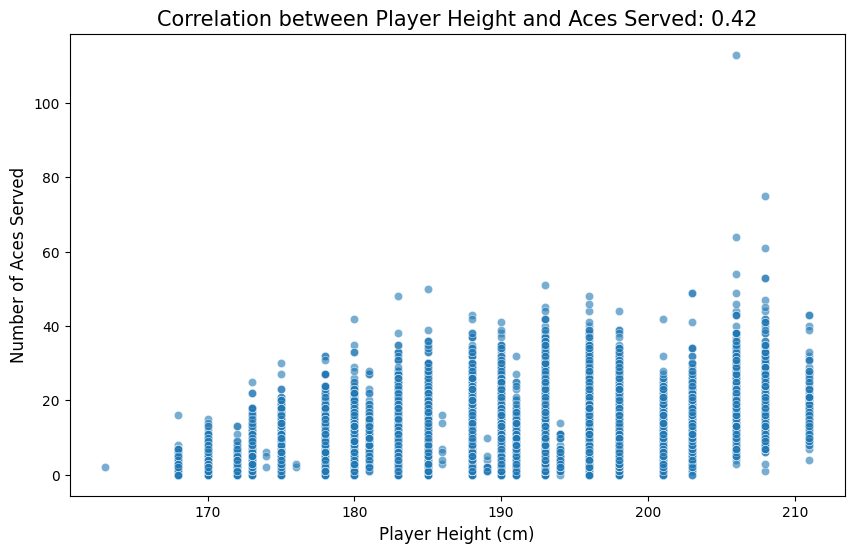

In [24]:

# Filter data to include relevant columns and drop rows with missing values
df_height_aces = df[['winner_ht', 'w_ace']].dropna()

# Calculate the correlation coefficient
correlation_coefficient = df_height_aces['winner_ht'].corr(df_height_aces['w_ace'])

# Plotting the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_height_aces, x='winner_ht', y='w_ace', alpha=0.6)
plt.title(f"Correlation between Player Height and Aces Served: {correlation_coefficient:.2f}", fontsize=15)
plt.xlabel('Player Height (cm)', fontsize=12)
plt.ylabel('Number of Aces Served', fontsize=12)
plt.show()